In [9]:
import numpy as np

# Sample corpus
corpus = ["cat is cute", "dog is lovely", "shark is hungry"]

In [10]:
# Create a vocabulary and word-to-index mapping
vocab = {}
index = 0
for sentence in corpus:
    words = sentence.lower().split()
    for word in words:
        if word not in vocab:
            vocab[word] = index
            index += 1

vocab

{'cat': 0, 'is': 1, 'cute': 2, 'dog': 3, 'lovely': 4, 'shark': 5, 'hungry': 6}

In [11]:
# Initialize co-occurrence matrix
matrix_size = len(vocab)
co_occurrence_matrix = np.zeros((matrix_size, matrix_size))

# Define context window size
window_size = 1

# Build co-occurrence matrix
for sentence in corpus:
    words = sentence.lower().split()
    for i in range(len(words)):
        target_word_idx = vocab[words[i]]
        for j in range(max(0, i - window_size), min(i + window_size + 1, len(words))):
            if i != j:
                context_word_idx = vocab[words[j]]
                co_occurrence_matrix[target_word_idx][context_word_idx] += 1

co_occurrence_matrix

array([[0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 1., 1., 1., 1., 1.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.]])

In [12]:
# Initialize word vectors randomly
embedding_dim = 2
word_vectors = np.random.rand(matrix_size, embedding_dim)

In [13]:
# Hyperparameters
learning_rate = 0.01
epochs = 100

# Training GloVe (Gradient Descent)
for _ in range(epochs):
    for i in range(matrix_size):
        for j in range(matrix_size):
            if co_occurrence_matrix[i][j] > 0:
                error = np.dot(word_vectors[i], word_vectors[j]) - np.log(co_occurrence_matrix[i][j])
                gradient = 2 * error * word_vectors[j]
                word_vectors[i] -= learning_rate * gradient

# Access the word vectors
for word, idx in vocab.items():
    print(f"{word}: {word_vectors[idx]}")


cat: [0.65468484 0.73286507]
is: [-0.16379783  0.16975301]
cute: [0.31266592 0.5434629 ]
dog: [0.7577414  0.82018161]
lovely: [0.68988391 0.68766746]
shark: [0.20137665 0.41363566]
hungry: [0.92029521 0.43570329]


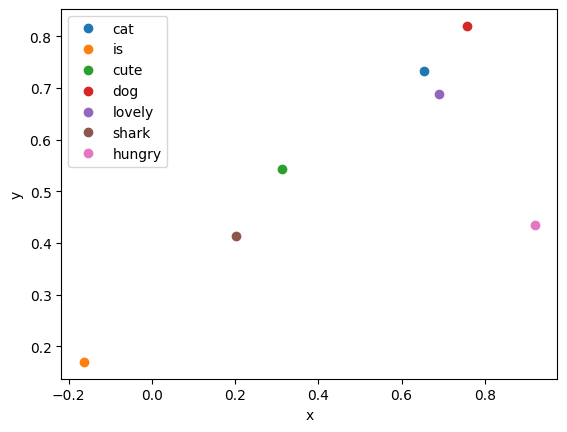

In [14]:
import matplotlib.pyplot as plt

# Plot the points
for word, index in vocab.items():
    plt.plot(word_vectors[index][0], word_vectors[index][1], "o", label=word)

# Label the axes
plt.xlabel("x")
plt.ylabel("y")

# Show the plot
plt.legend()
plt.show()